In [2]:
import sys
##sys.path.append('/feynman/home/dap/lceg/rp269101/.local/lib/python3.6/site-packages')
##sys.path.append('/usr/lib64/python3.6/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
from random import randint
from astropy.io import fits,ascii
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from scipy.special import erfc,erf
#from mpmath import erf
import dask
from scipy.integrate import simps
pd.options.mode.chained_assignment = None
from astropy.cosmology import FlatLambdaCDM
import functools
import os
from astropy.cosmology import z_at_value
import astropy.units as u
import random
p = 0.01  
from astropy.constants import M_sun,pc

In [3]:
cosmo= FlatLambdaCDM(Om0=0.3089,H0=100)

def nzandveff(z_,gal_,dz,area):
    v=(round(min(z_),2))
    q=(round(max(z_),2))
    n = round((q - v)/dz + 1,2)
#    print(n)
    shell = np.linspace(v,q,int(n))
 #   print(shell)
    edges = zeros(len(shell)-1)
    dr  = zeros(len(shell) - 1)
    for i in range(0,len(edges)):
        edges[i] =(shell[i] + shell[i+1])/2
        dr[i] = (cosmo.comoving_distance(shell[i+1]).value - cosmo.comoving_distance(shell[i]).value) 
    nz,_,_ = stats.binned_statistic(z_,gal_, statistic='sum', bins=shell)
    n_z = nz/(4*pi*cosmo.comoving_distance(edges).value**2*dr*(area/41253))
    Veff = sum(((n_z*20000)/(1.+n_z*20000))**2*volumes)
    return edges,nz,n_z,Veff/10**9,dr


In [4]:
path = "/Volumes/LaCie/lightcone2_wide/"
files = os.listdir(path)

for i in range(10,11):
    
    df = pd.read_parquet(path+files[i])
    df = df[df.M200C > 1e10]
    
df1 = df.sample(frac=0.001, replace=True, random_state=1)
df2 = df.sample(frac=0.1, replace=True, random_state=1)

In [5]:
ra = df1.RA.values
dec = df1.DEC.values
Dc= df1.Rcom.values
M200 = df1.M200C.values
Rvir = df1.RVIR.values

z = z_at_value(cosmo.comoving_distance,Dc*u.Mpc).value

(array([2303., 2235., 2218., 2355., 2335., 2506., 2391., 2463., 2474.,
        2417.]),
 array([0.65264815, 0.6600361 , 0.667424  , 0.6748119 , 0.68219984,
        0.6895878 , 0.6969757 , 0.70436364, 0.7117515 , 0.71913946,
        0.7265274 ], dtype=float32),
 <BarContainer object of 10 artists>)

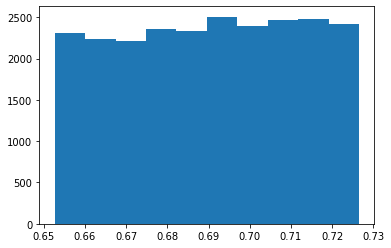

In [6]:
plt.hist(z)

In [186]:
conversion = (pc.value*1e2)**3/(M_sun.value*1e3)

Omz = cosmo.Om(z)
rhocrit = cosmo.critical_density(z).value
deltavir = 18*np.pi**2 + 82*(1-Omz) - 39*(1-Omz)**2
Mvir = (4./3.)*np.pi*(Rvir*1e3)**3*deltavir*rhocrit*conversion*(0.6774)**(4)
#Deltavir = 

(array([1.1779e+04, 1.0406e+04, 1.2220e+03, 2.1300e+02, 5.1000e+01,
        1.6000e+01, 6.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.2939429, 1.45289  , 1.6118371, 1.7707841, 1.9297312, 2.0886784,
        2.2476254, 2.4065726, 2.5655196, 2.7244668, 2.8834138],
       dtype=float32),
 <BarContainer object of 10 artists>)

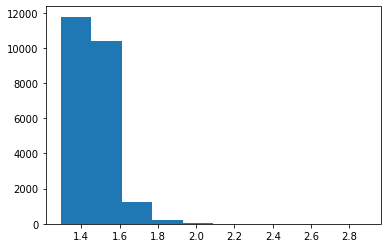

In [197]:
plt.hist(Mvir/M200)

In [156]:
ra2 = df.RA.values
dec2 = df.DEC.values
Dc2= df.Rcom.values
M2002 = df.M200C.values
Rvir2 = df.RVIR.values

In [157]:
area = (ra2.max() - ra2.min())*(dec.max()-dec.min())

In [158]:
print(area)

640.4235811924328


In [159]:
print(Dc2.min())
print(Dc2.max())

1650.0
1800.0


In [192]:
bins = np.logspace(10,14,40)
dn,edge = np.histogram(M200,bins=bins)
dn2,edge2 = np.histogram(Mvir,bins=bins)

In [179]:
center = [(edge[i]+edge[i+1])/2 for i in range(0, len(edge)-1, 1)]
dx = [np.log10(edge[i+1]/edge[i]) for i in range(0, len(edge)-1, 1)]
V = (4./3.)*np.pi*(area/41253)*(Dc2.max()**3 - Dc2.min()**3)

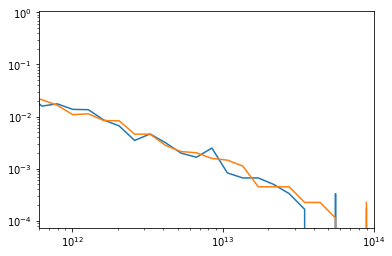

In [209]:
plt.xlim(6e11,1e14)
plt.loglog(center,1000*(1./V)*(dn/dx)/(0.6766))
plt.loglog(center,1000*(1./V)*(dn2/dx))